In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from datetime import datetime
import tweepy
import json

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "rGqLoDUcIGF8iCralLKd7WJSH"
consumer_secret = "xcVBoNo2Z02ClUwP1HbUDDuRGovWsbWRqi7XQ7PYTbL7Qz5WZR"
access_token = "1039694586799681538-oOsoceHKJ7ovwb5ww7N2rRedXTs5Ck"
access_token_secret = "YwhmLtw9UiSZEj3OiHXnZeWGPwmhErpVHnQ3Ldu4cHrvn"

In [55]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [56]:
sentiments = []

target_users = ("@CBS", "@BBC", "@CNN", "@FoxNews", "@NYTimes")
for user in target_users:
    
    counter = 0
    
    public_tweets = api.user_timeline(user, count = 100)

        
    for tweet in public_tweets:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Negative" : neg,
                           "Positive" : pos,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
     

        counter = counter + 1

In [57]:
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.8858,Tue Oct 02 21:25:29 +0000 2018,0.000,0.646,0.354,RT @CBSAllAccess: It's a great day to be a fan...,0,@CBS
1,0.0000,Tue Oct 02 18:36:26 +0000 2018,0.000,1.000,0.000,⚡️ “Happy Together Premieres on CBS”\n\nhttps:...,1,@CBS
2,-0.4449,Tue Oct 02 17:52:53 +0000 2018,0.164,0.836,0.000,"@miamicah We don't know for sure about that, b...",2,@CBS
3,0.0000,Tue Oct 02 16:49:34 +0000 2018,0.000,1.000,0.000,⚡️ “The Neighborhood Premieres on CBS”\n\nhttp...,3,@CBS
4,0.3182,Tue Oct 02 02:42:23 +0000 2018,0.000,0.881,0.119,RT @startrekcbs: Discover the next adventure o...,4,@CBS
5,0.7650,Tue Oct 02 01:10:54 +0000 2018,0.000,0.708,0.292,The stars of @TheNeighborhood and @happytogeth...,5,@CBS
6,0.0000,Tue Oct 02 00:01:07 +0000 2018,0.000,1.000,0.000,RT @TheNeighborhood: It's almost time! Our liv...,6,@CBS
7,0.0000,Mon Oct 01 21:56:03 +0000 2018,0.000,1.000,0.000,Head over to the CBS Facebook page now for the...,7,@CBS
8,0.2960,Mon Oct 01 16:33:11 +0000 2018,0.000,0.864,0.136,Join @happytogether's @wayansjr and @TheNeighb...,8,@CBS
9,-0.2263,Sun Sep 30 23:51:26 +0000 2018,0.091,0.909,0.000,"Due to #NFL football game overrun, #CBS Sunday...",9,@CBS


In [58]:
news_sentiments.to_csv("Twitter_News_Mood.csv", index=False)

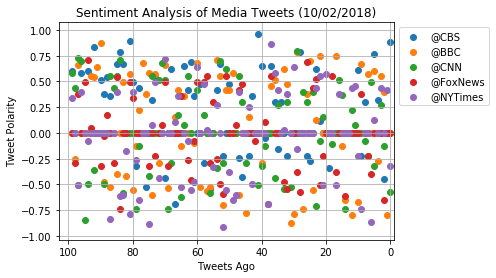

In [73]:
colors = {"CBS":"green","Fox":"blue", "CNN":"red", "nytimes": "yellow","BBC": "lightblue"}

plt.xlim(103, -1)

for user in target_users:
    dataframe = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    

plt.legend(bbox_to_anchor = (1,1))


plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")


plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")

plt.show()

In [74]:
avg_sentiment = news_sentiments.groupby("User")["Compound"].mean()
avg_sentiment

User
@BBC        0.060679
@CBS        0.152432
@CNN        0.019830
@FoxNews    0.000270
@NYTimes   -0.032926
Name: Compound, dtype: float64

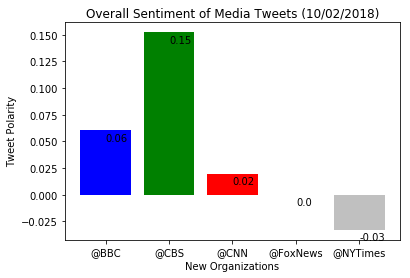

In [72]:
x_axis = np.arange(len(avg_sentiment))

xlabels = avg_sentiment.index

count = 0

for sentiment in avg_sentiment:
    plt.text(count, sentiment-.01, str(round(sentiment,2)))
    
    count = count + 1

plt.bar(x_axis, avg_sentiment, tick_label = xlabels, color = [ 'b', 'g', 'r', 'y','silver'])

plt.title("Overall Sentiment of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.ylabel("Tweet Polarity")
plt.xlabel("New Organizations")

plt.savefig("Overall Sentiment of Media Tweets")

plt.show()